## Observations and Insights 

1. There is a positive correlation between the mouse's weight and the volume of the tumor. The heavier a mouse was, the larger it's tumor was likely to be. 

2. For Mouse u364, the tumor volume decreased over time, as it used Capumolin. 

3. Capumolin also had the highest number of trials, compared to the other drug regimens, and it also had the lowest average tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_data[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicates) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame
mice = clean_df['Mouse ID'].nunique()
mice

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = clean_df[['Drug Regimen', 'Tumor Volume (mm3)']]

mean = summary.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = summary.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = summary.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_dev = summary.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = summary.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({
    'Average Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem
})
summary_df = summary_df.round(2)
summary_df



,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg(['mean', 'median', 'var', 'std', 'sem'], axis = 'columns')

,mean,median,var,std,sem
Capomulin,22.502,24.95,374.47687,19.351405,8.654211
Ceftamin,30.080,39.29,626.52060,25.030394,11.193932
Infubinol,30.978,43.13,646.75657,25.431409,11.373272
Ketapril,37.274,53.70,939.10328,30.644792,13.704768
Naftisol,36.348,52.51,887.02232,29.782920,13.319327
Placebo,35.178,52.29,817.32107,28.588828,12.785312
Propriva,30.756,43.85,629.96643,25.099132,11.224673
Ramicane,21.910,23.49,361.71545,19.018818,8.505474
Stelasyn,34.878,52.43,800.37372,28.290877,12.652065
Zoniferol,32.216,48.53,683.61723,26.146075,11.692880


## Bar and Pie Charts

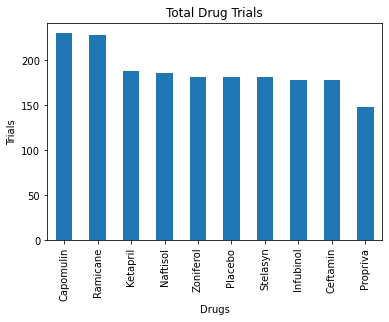

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugs_df = clean_df['Drug Regimen'].value_counts()
xaxis = drugs_df.index
yaxis = drugs_df.values
drugs_df.plot(kind='bar')
plt.xlabel('Drugs')
plt.ylabel('Trials')
plt.title('Total Drug Trials')
plt.show()


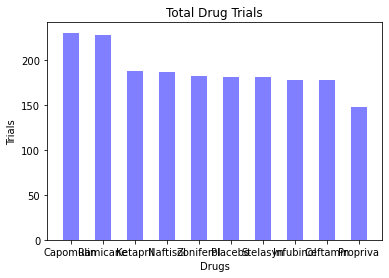

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(xaxis, yaxis, color='b', alpha=0.5, align='center', width =0.5)
plt.xlabel('Drugs')
plt.ylabel('Trials')
plt.title('Total Drug Trials')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

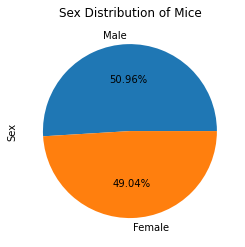

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_df['Sex'].value_counts()
sex.plot(kind='pie', autopct = '%1.2f%%')
plt.title("Sex Distribution of Mice")
plt.show


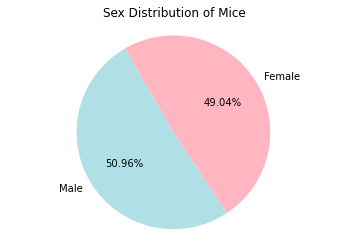

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=['powderblue', 'lightpink']
explode = (0, 0)
plt.figure()
plt.pie(sex.values, explode=explode, labels=sex.index.values, colors=colors, autopct='%1.2f%%', shadow=False, startangle=120)
plt.axis('equal')
plt.title('Sex Distribution of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_final = clean_df.groupby('Mouse ID').max().reset_index()

merge_df = tumor_final[['Mouse ID', 'Timepoint']].merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [40]:
cap = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ram = merge_df.loc[merge_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
inf = merge_df.loc[merge_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
cef = merge_df.loc[merge_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin Stats
quart_cap = cap.quantile([.25, .5, .75])
lower_cap = quart_cap[.25]
upper_cap=quart_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap=lower_cap-(1.5*iqr_cap)
upout_cap=upper_cap+(1.5*iqr_cap)

#Ramicane stats
quart_ram=ram.quantile([.25,.5,.75])
lower_ram=quart_ram[.25]
upper_ram=quart_ram[.75]
iqr_ram=upper_ram-lower_ram
lowout_ram=lower_ram-(1.5*iqr_ram)
upout_ram=upper_ram+(1.5*iqr_ram)

#Infubinol stats
quart_inf=inf.quantile([.25,.5,.75])
lower_inf=quart_inf[.25]
upper_inf=quart_inf[.75]
iqr_inf=upper_inf-lower_inf
lowout_inf=lower_inf-(1.5*iqr_inf)
upout_inf=upper_inf+(1.5*iqr_inf)

#Ceftamine stats
quart_cef=cef.quantile([.25,.5,.75])
lower_cef= quart_cef[.25]
upper_cef=quart_cef[.75]
iqr_cef= upper_cef-lower_cef
lowout_cef=lower_cef-(1.5*iqr_cef)
upout_cef=upper_cef+(1.5*iqr_cef)

print(f"The outliers for Capomulin are the values below {round(lowout_cap, 2)} and above {round(upout_cap, 2)}.")
print(f"The outliers for Ramicane are the values below {round(lowout_ram, 2)} and above {round(upout_ram, 2)}.")
print(f"The outliers for Infubinol are the values below {round(lowout_inf, 2)} and above {round(upout_inf, 2)}.")
print(f"The outliers for Ceftamine are the values below {round(lowout_cef, 2)} and above {round(upout_cef, 2)}.")
      

The outliers for Capomulin are the values below 20.7 and above 51.83.
The outliers for Ramicane are the values below 17.91 and above 54.31.
The outliers for Infubinol are the values below 36.83 and above 82.74.
The outliers for Ceftamine are the values below 25.36 and above 87.67.


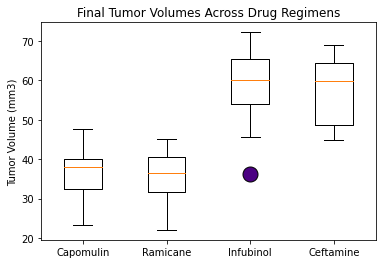

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = dict(markerfacecolor = 'indigo', markersize=15)
plt.boxplot([cap,ram,inf,cef], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamine'], flierprops = boxplot)
plt.title('Final Tumor Volumes Across Drug Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

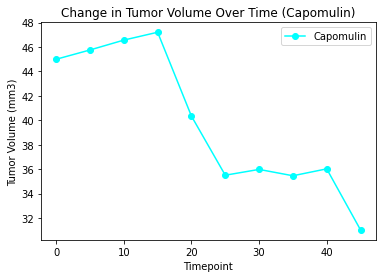

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_cap = clean_df.loc[clean_df['Mouse ID'] == 'u364']
plt.plot(mouse_cap['Timepoint'], mouse_cap['Tumor Volume (mm3)'], marker = 'o', color='cyan', label = 'Capomulin')
plt.legend(loc='best')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Change in Tumor Volume Over Time (Capomulin)')
plt.show()

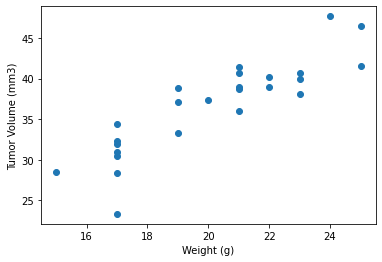

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_2 =  merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
cap_mean = cap_2.groupby(['Mouse ID']).mean()
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

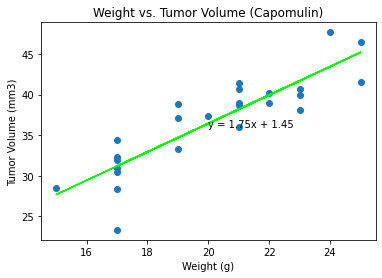

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
reg_val = cap_mean['Weight (g)'] * slope + intercept
lin_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])
plt.plot(cap_mean['Weight (g)'], reg_val, color='lime')
plt.annotate(lin_eq,(20,36))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs. Tumor Volume (Capomulin)')
plt.show()
